In [2]:
data = pd.read_csv('dqlab_telco.csv')

In [3]:
data.head(5)

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7113, 22)

In [5]:
data.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [6]:
list(data.columns.values)

['UpdatedAt',
 'customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [7]:
data.customerID.unique()

array(['45759018157', '45557574145', '45366876421', ..., '45655964195',
       '45899251814', '45427332508'], dtype=object)

In [8]:
data.describe()

,UpdatedAt,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7113.000000,7113.000000,7014.000000,7087.000000,7098.000000
mean,202005.999016,0.161816,32.749358,67.018985,2306.582650
std,0.031357,0.368308,25.206376,117.396646,2575.212013
min,202005.000000,0.000000,0.000000,0.000000,19.000000
25%,202006.000000,0.000000,9.000000,36.100000,402.925000
50%,202006.000000,0.000000,30.000000,70.450000,1400.700000
75%,202006.000000,0.000000,56.000000,89.900000,3801.600000
max,202006.000000,1.000000,500.000000,9000.000000,80000.000000


Filter data untuk customer ID yang diawali dengan 45, panjangnya 11-12, dan hanya terdiri dari angka

In [9]:
data['valid_id'] = data['customerID'].astype(str).str.match(r'(45\d{9,10})')
data = (data[data['valid_id'] == True]).drop('valid_id',axis = 1)
print('Hasil jumlah ID yang terfilter: ', data['customerID'].count())

Hasil jumlah ID yang terfilter:  7006


In [10]:
#print(data[['customerID','valid_id']])

Drop duplicate data from customer id

In [11]:
data.drop_duplicates()
data = data.sort_values('UpdatedAt', ascending = False).drop_duplicates('customerID')
print('Jumlah customer ID yang sudah tidak ada duplicatenya adalah ', data['customerID'].count())

Jumlah customer ID yang sudah tidak ada duplicatenya adalah  6993


Handling missing values of data

In [12]:
print('Total missing values pada churn adalah ', data['Churn'].isnull().sum())
data.dropna(subset = ['Churn'], inplace = True)
print('Total rows after deleting missing values: ',data.shape)

Total missing values pada churn adalah  43
Total rows after deleting missing values:  (6950, 22)


In [13]:
print('total missing values per column:\n ',data.isnull().sum())

total missing values per column:
  UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn                0
dtype: int64


In [14]:
data['tenure'].fillna(11, inplace = True)

In [15]:
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = data[col_name].median()
    data[col_name].fillna(median, inplace = True)

In [16]:
print('Total missing values:', data.isnull().sum())

Total missing values: UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Identify Outlier

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

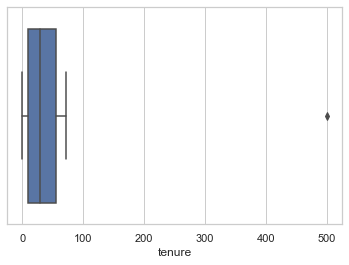

In [18]:
plt.figure()
sns.set(style = 'whitegrid')
sns.boxplot(x = data['tenure'])
plt.show()

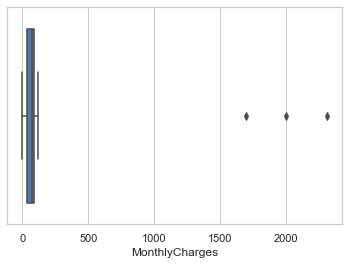

In [19]:
plt.figure()
sns.set(style = 'whitegrid')
sns.boxplot(x = data['MonthlyCharges'])
plt.show()

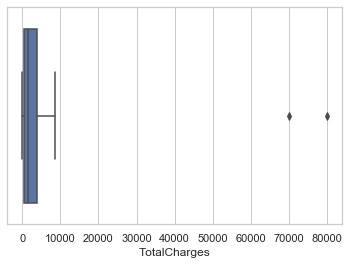

In [20]:
plt.figure()
sns.set(style = 'whitegrid')
sns.boxplot(x = data['TotalCharges'])
plt.show()

In [21]:
Q1 = data[['tenure','MonthlyCharges','TotalCharges']].quantile(0.25)
Q3 = data[['tenure','MonthlyCharges','TotalCharges']].quantile(0.75)

IQR = Q3 - Q1

In [22]:
maximum = Q3 + (1.5*IQR)
print('Nilai maksimum dari masing-masing variabel adalah ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('Nilai minimum dari masing-masing variabel adalah ')
print(minimum)

more_than = (data > maximum)
lower_than = (data < minimum)
data = data.mask(more_than, maximum, axis = 1)
data = data.mask(lower_than, minimum, axis = 1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(data[['tenure','MonthlyCharges','TotalCharges']].describe())

Nilai maksimum dari masing-masing variabel adalah 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64
Nilai minimum dari masing-masing variabel adalah 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


Feature Scalling

In [23]:
for col_name in list(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                     'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(data[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

In [24]:
data = data.replace(['Wanita','Laki-Laki','Iya','Churn'],['Female', 'Male', 'Yes', 'Yes'])
for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(data[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


Churn Analysis

In [25]:
#Import library yang dibutuhkan 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

In [26]:
telco = pd.read_csv('C:\\Users\\hp\\Documents\\Python\\dqlab_telco_final.csv')
telco.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [27]:
telco.customerID.nunique()

6950

In [28]:
telco['Churn'].value_counts()

No     5114
Yes    1836
Name: Churn, dtype: int64

Exploratory Data Analysis
EDA dilakukan dengan beberapa cara:
Univariat Analysis — analisis deskriptif dengan satu variabel.
Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel.
Multivariat Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel.

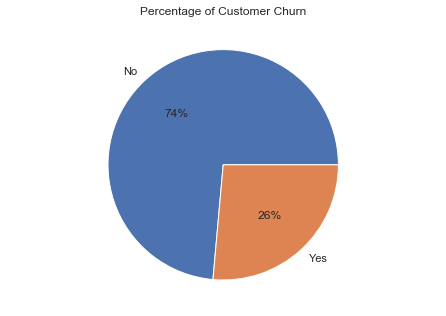

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = 'No', 'Yes'
churn = telco.Churn.value_counts()
ax.pie(churn, labels= labels, autopct='%.0f%%')
plt.title('Percentage of Customer Churn')
plt.show()

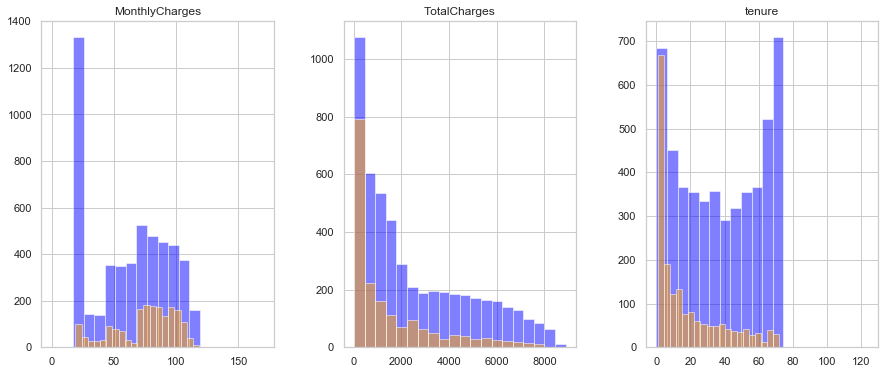

In [30]:
#Variabel Numerik (memilih variabel prediktor yang bersifat numerik)
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
fig, ax = plt.subplots(1,3, figsize = (15,6))
telco[telco.Churn == 'No'][numerical_features].hist(bins = 20,color = 'blue', alpha = 0.5, ax = ax)
telco[telco.Churn == 'Yes'][numerical_features].hist(bins = 20, color = 'orange', alpha = 0.5, ax = ax )
plt.show()

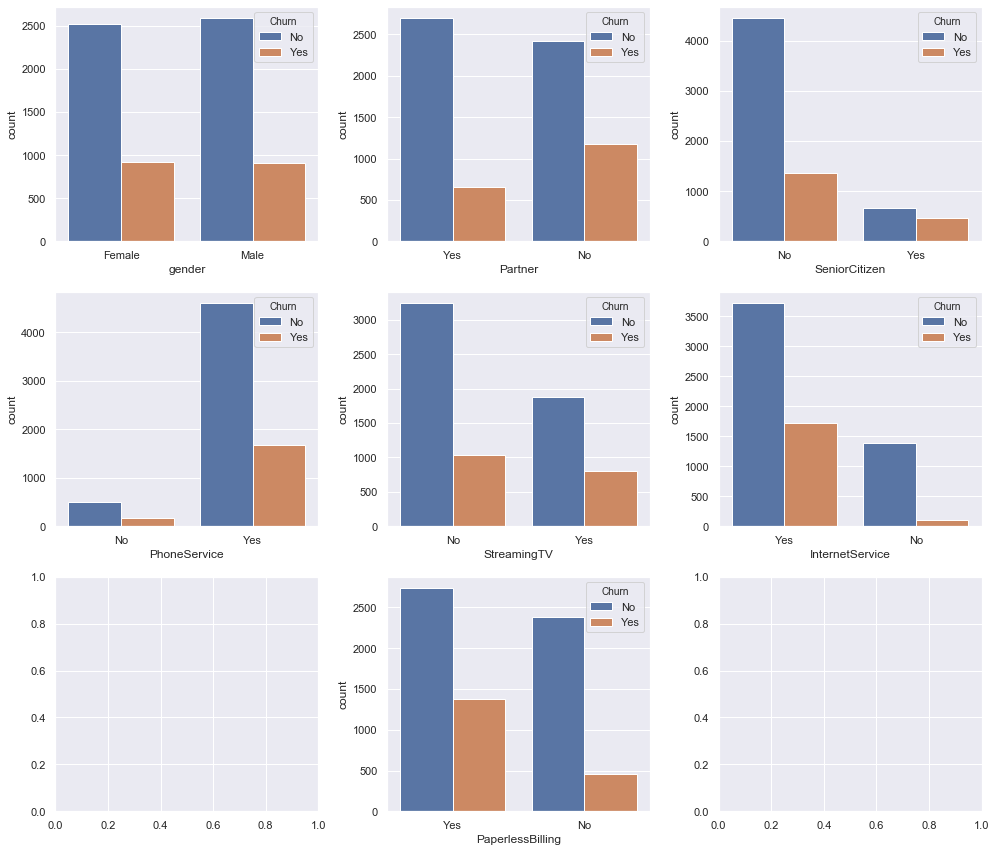

In [31]:
#variabel kategorik (memilik variabel prediktor melalui analisis bivariat)
sns.set(style = 'darkgrid')
fig, ax = plt.subplots(3,3,figsize = (14,12))
sns.countplot(data = telco, x = 'gender', hue = 'Churn', ax = ax[0][0])
sns.countplot(data = telco, x = 'Partner', hue = 'Churn', ax = ax[0][1])
sns.countplot(data = telco, x ='SeniorCitizen', hue = 'Churn', ax=ax[0][2])
sns.countplot(data = telco, x = 'PhoneService', hue = 'Churn', ax = ax[1][0])
sns.countplot(data = telco, x = 'StreamingTV', hue = 'Churn', ax = ax[1][1])
sns.countplot(data = telco, x = 'InternetService', hue = 'Churn', ax = ax[1][2])
sns.countplot(data = telco, x = 'PaperlessBilling', hue = 'Churn', ax = ax[2][1])
plt.tight_layout()
plt.show()

In [32]:
#hapus kolom yang tidak perlu
cleaned_data = telco.drop(['customerID','UpdatedAt'], axis = 1)
cleaned_data.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


Encoding Data
From string to numeric

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in cleaned_data.columns:
	if cleaned_data[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
	cleaned_data[column] = LabelEncoder().fit_transform(cleaned_data[column])
print(cleaned_data.describe())

            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

In [35]:
from sklearn.model_selection import train_test_split
# Predictor dan target
X = cleaned_data.drop('Churn', axis = 1)
y = cleaned_data['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:',x_train.shape,',sedangkan Jumlah baris dan kolom dari y_train adalah:',y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize = True))
print('Jumlah baris dan kolom dari x_test adalah:',x_test.shape,',sedangkan Jumlah baris dan kolom dari y_test adalah:',y_test.shape)
print('Prosenrase Churn di data Testing adalah:')
print(y_test.value_counts(normalize = True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) ,sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 10) ,sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosenrase Churn di data Testing adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


Modelling

In [36]:
log_model = LogisticRegression().fit(x_train, y_train)
print('Model Logistic Regression yang terbentuk adalah: ', log_model)

Model Logistic Regression yang terbentuk adalah:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
y_train_pred = log_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Logistic Regression):\n')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Logistic Regression):

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.80      0.79      4865



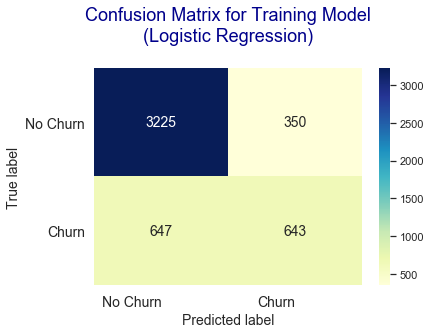

In [38]:
#confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred)), ('No Churn','Churn'),('No Churn', 'Churn'))
plt.figure()
# Plot confusion matrix
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 14}, fmt="d", cmap="YlGnBu")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [39]:
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test,y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.49      0.56       546

    accuracy                           0.80      2085
   macro avg       0.74      0.70      0.71      2085
weighted avg       0.78      0.80      0.79      2085



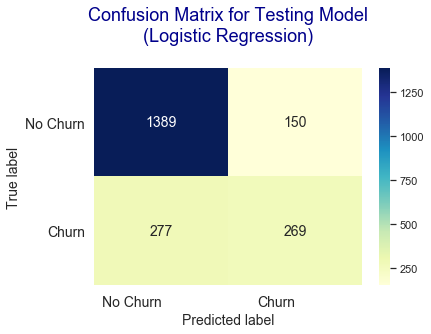

In [40]:
#confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred)), ('No Churn','Churn'),('No Churn', 'Churn'))
plt.figure()
# Plot confusion matrix
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 14}, fmt="d", cmap="YlGnBu")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

Random Forest Classifier

In [41]:
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [42]:
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3575
           1       0.99      0.92      0.95      1290

    accuracy                           0.98      4865
   macro avg       0.98      0.96      0.97      4865
weighted avg       0.98      0.98      0.98      4865



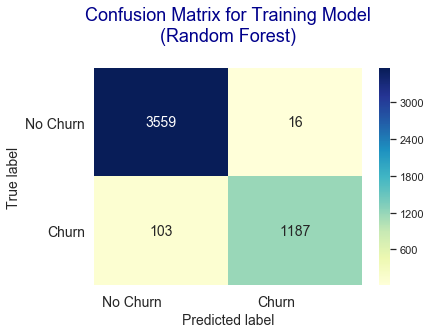

In [46]:
#confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred)), ('No Churn','Churn'),('No Churn', 'Churn'))
plt.figure()
# Plot confusion matrix
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 14}, fmt="d", cmap="YlGnBu")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [45]:
y_test_pred = rdf_model.predict(x_test)
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1539
           1       0.58      0.44      0.50       546

    accuracy                           0.77      2085
   macro avg       0.70      0.67      0.68      2085
weighted avg       0.76      0.77      0.76      2085



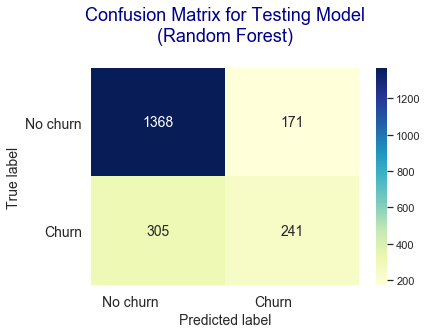

In [47]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred)), ('No churn','Churn'), ('No churn','Churn'))
#plot
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 14}, fmt="d", cmap="YlGnBu")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

XGBoost Classifier

In [48]:
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [49]:
y_train_pred = gbt_model.predict(x_train)
print('Classification Report Training Model (XGBoost):')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (XGBoost):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



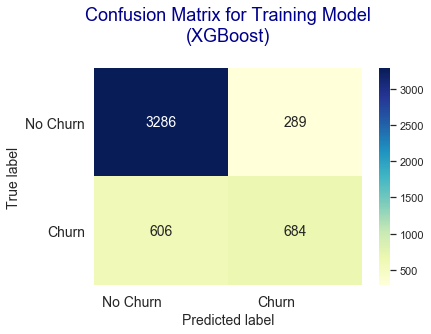

In [50]:
#confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred)), ('No Churn','Churn'),('No Churn', 'Churn'))
plt.figure()
# Plot confusion matrix
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 14}, fmt="d", cmap="YlGnBu")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.title('Confusion Matrix for Training Model\n(XGBoost)\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [51]:
y_test_pred = gbt_model.predict(x_test)
print('Classification Report Training Model (XGBoost):')
print(classification_report(y_test,y_test_pred))

Classification Report Training Model (XGBoost):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



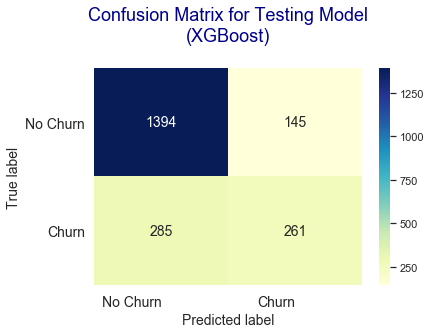

In [52]:
#confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred)), ('No Churn','Churn'),('No Churn', 'Churn'))
plt.figure()
# Plot confusion matrix
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 14}, fmt="d", cmap="YlGnBu")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.title('Confusion Matrix for Testing Model\n(XGBoost)\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

Menentukan Model terbaik
Menentukan Algoritma Model Terbaik
Model yang baik adalah model yang mampu memberikan performa bagus di fase training dan testing model.

1. Over-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan sangat baik di fase training, akan tetapi tidak mampu memprediksi sama baiknya di fase testing.
2. Under-Fitting adalah suatu kondisi dimana model kurang mampu memprediksi dengan baik di fase training, akan tetapi mampu memprediksi dengan baik di fase testing.
3. Appropriate-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan baik di fase training maupun di fase testing.
deployment model:
#Save Model
pickle.dump(log_model, open('best_model_churn.pkl', 'wb'))

Model random forest over-fitting, sehingga yang terbaik adalah model logistic_regression